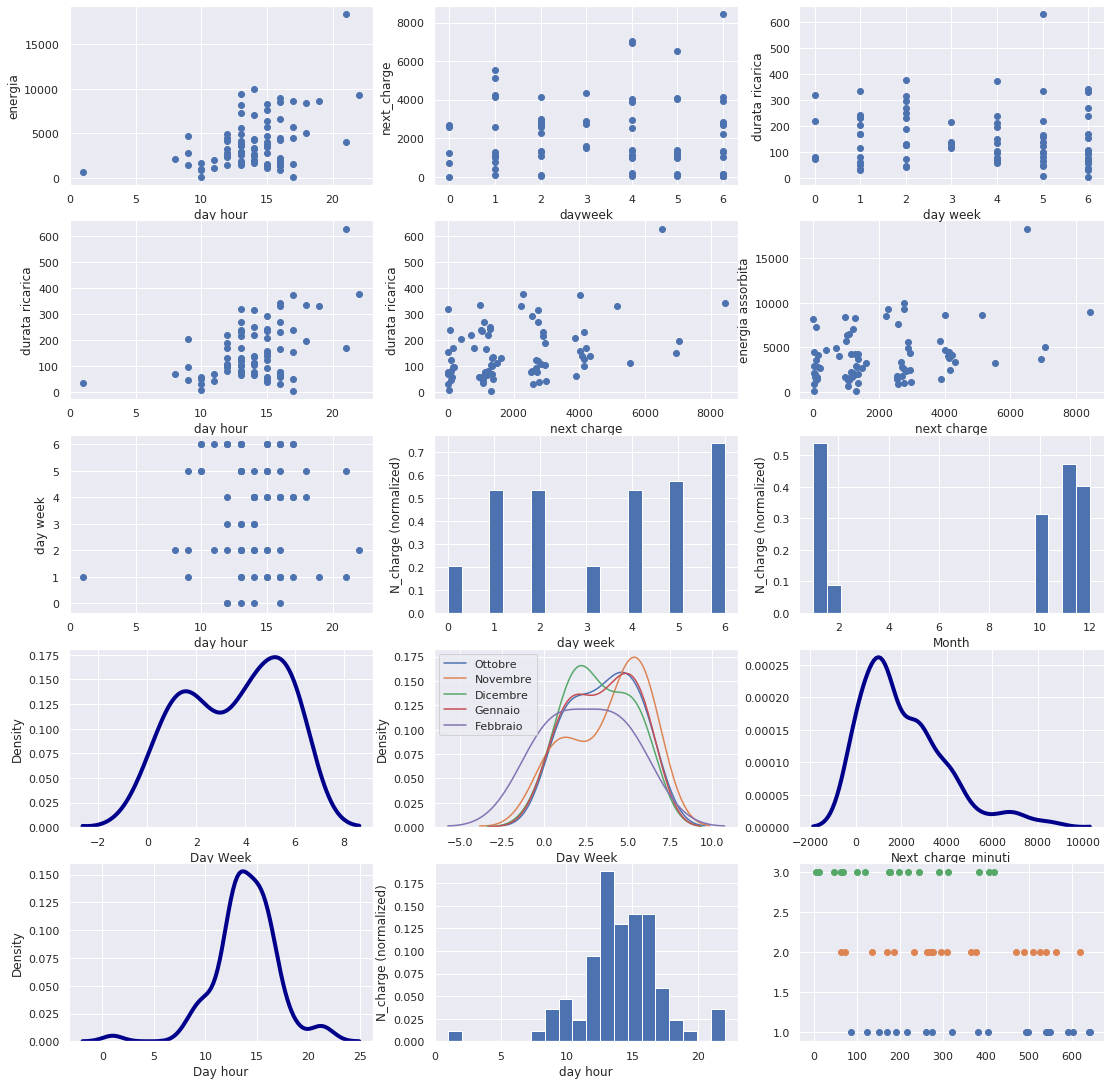

In [32]:
#import time-series from .csv file
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import numpy as np
from sklearn.model_selection  import GridSearchCV
from sklearn import preprocessing
from scipy.stats import norm
import math
import random
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})
df1 = pd.read_csv("/home/just/Scaricati/export.csv" )     #leggo i dati
mese = df1.iloc[:,0]
energia = df1.iloc[:,1]
day_hour = df1.iloc[:,2]
day_week = df1.iloc[:,3]
durata_ricarica = df1.iloc[:,4]
next_charge = df1.iloc[:,5]
weekend  = df1.iloc[:,6]
y = df1[['Durata_ricarica_minuti']]
X = df1[['Mese','Energia_assorbita_Wh','Day_hour','Day_week','Next_charge_minuti','Weekend']]
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))    #effettuo lo scaling dei dati
X_scaled = X_std * (1) + 0
mese1 = []
mese2 = []
mese3 = []
mese4 = []
mese5 = []
def valore_atteso(vett):    # calcolo il valore atteso
    prob = []
    for i in range(0,7):   # calcolo la probabilità per ogni giorno della settimana
        x = 0
        for j in range (0,len(vett)):
            if (vett[j] == i):
                x = x + 1
        prob.append(x/len(vett))
    return 0*prob[0] + 1 * prob[1] + 2 * prob[2] + 3 * prob[3] + 4 * prob[4] + 5 * prob[5] + 6 * prob[6]
    
    
    
for i in range(0,len(day_week[:])):
    if (mese[i] == 10):
        mese1.append(day_week[i])
    if (mese[i] == 11):
        mese2.append(day_week[i])
    if (mese[i] == 12):
        mese3.append(day_week[i])
    if (mese[i] == 1):
        mese4.append(day_week[i])
    if (mese[i] == 2):
        mese5.append(day_week[i])

plt.subplot(5,3,1)
plt.scatter(x = day_hour , y = energia)
plt.ylabel('energia')
plt.xlabel('day hour')
#plt.subplot(2,3,3)
#plt.scatter(x= durata_ricarica, y = energia)
#plt.xlabel('durata ricarica')
#plt.ylabel('energia assorbita')
plt.subplot(5,3,2)
plt.scatter(x=day_week, y = next_charge)
plt.xlabel('dayweek')
plt.ylabel('next_charge')
plt.subplot(5,3,4)
plt.scatter(x=day_hour, y = durata_ricarica)
plt.xlabel('day hour')
plt.ylabel('durata ricarica')
plt.subplot(5,3,5)
plt.scatter(x=next_charge,y=durata_ricarica)
plt.xlabel('next charge')
plt.ylabel('durata ricarica')
plt.subplot(5,3,6)
plt.scatter(x=next_charge,y=energia)
plt.xlabel('next charge')
plt.ylabel('energia assorbita')
plt.subplot(5,3,3)
plt.scatter(x=day_week,y=durata_ricarica)
plt.ylabel('durata ricarica')
plt.xlabel('day week')
plt.subplot(5,3,7)
plt.scatter(x=day_hour, y= day_week)
plt.xlabel('day hour')
plt.ylabel('day week')
plt.subplot(5,3,8)
plt.hist(day_week,bins = 20, density = True)
plt.xlabel('day week')
plt.ylabel('N_charge (normalized)')
plt.subplot(5,3,9)
plt.hist(mese,bins = 20,density = True)
plt.xlabel('Month')
plt.ylabel('N_charge (normalized)')
plt.subplot(5,3,10)   #grafico del numero di ricariche in funzione del giorno della settimana
ax = sns.distplot(day_week, hist=False, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Day Week', ylabel='Density')
plt.subplot(5,3,11) #grafici del numero di ricariche in funzione del giorno della settimana suddivise per mese
ax = sns.distplot(mese1, hist=False, kde=True, 
             bins=20, hist_kws={'edgecolor':'black'}, label = 'Ottobre')
ax = sns.distplot(mese2, hist=False, kde=True, 
             bins=20, hist_kws={'edgecolor':'black'}, label = 'Novembre')
ax = sns.distplot(mese3, hist=False, kde=True, 
             bins=20, hist_kws={'edgecolor':'black'}, label = 'Dicembre')
ax = sns.distplot(mese4, hist=False, kde=True, 
             bins=20, hist_kws={'edgecolor':'black'}, label = 'Gennaio')
ax = sns.distplot(mese5, hist=False, kde=True, 
             bins=20, hist_kws={'edgecolor':'black'}, label = 'Febbraio')
ax.set(xlabel='Day Week', ylabel='Density')
plt.subplot(5,3,12)  #grafico del next charge
sns.distplot(next_charge, hist=False, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.subplot(5,3,13)
ax = sns.distplot(day_hour, hist=False, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Day hour', ylabel='Density')
plt.subplot(5,3,14)
plt.hist(day_hour,bins = 20,density = True)
plt.xlabel('day hour')
plt.ylabel('N_charge (normalized)')
plt.subplots_adjust(left=None, bottom=None, right=3, top=3, wspace=None, hspace=None)
rateParameter = 1 / next_charge.mean()
def nextTime(rateParameter):
    return -math.log(1.0 - random.random()) / rateParameter
arrivo1 = []
arrivo2 = []
arrivo3 = []
temp1 = 0
temp2 = 0
temp3 = 0
y1 = []
y2 = []
y3 = []
for i in range(0,20):
    temp1 = temp1 + nextTime(rateParameter)/60
    temp2 = temp2 + nextTime(rateParameter)/60
    temp3 = temp3 + nextTime(rateParameter)/60
    
    arrivo1.append(temp1)
    arrivo2.append(temp2)
    arrivo3.append(temp3)
    y1.append(1)
    y2.append(2)
    y3.append(3)
plt.subplot(5,3,15)
plt.scatter(arrivo1,y1)
plt.scatter(arrivo2,y2)
plt.scatter(arrivo3,y3)

In [23]:
print(np.mean(arrivo1),np.mean(arrivo2),np.mean(arrivo3))
print(next_charge.mean())

56057.096111823965 49387.770962675146 47817.62185834334
2067.906172839506
